In [61]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [ ]:
# Please fill in your names here
NAME_STUDENT_1 = "Chen Peng"
NAME_STUDENT_2 = "Xinyi Kong"

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [55]:
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe.describe()

,Team,League,Year,RA,...,RankPlayoffs,G,OOBP,OSLG
count,1232.00,1232.0,1232.00,1232.00,...,244.00,1232.00,420.00,420.00
mean,15.67,0.5,1988.96,715.08,...,1.72,3.92,0.33,0.42
std,9.72,0.5,14.82,93.08,...,1.10,0.62,0.02,0.03
min,0.00,0.0,1962.00,472.00,...,0.00,0.00,0.29,0.35
25%,7.00,0.0,1976.75,649.75,...,1.00,4.00,0.32,0.40
50%,16.00,0.5,1989.00,709.00,...,2.00,4.00,0.33,0.42
75%,23.00,1.0,2002.00,774.25,...,3.00,4.00,0.34,0.44
max,38.00,1.0,2012.00,1103.00,...,4.00,7.00,0.38,0.50


1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

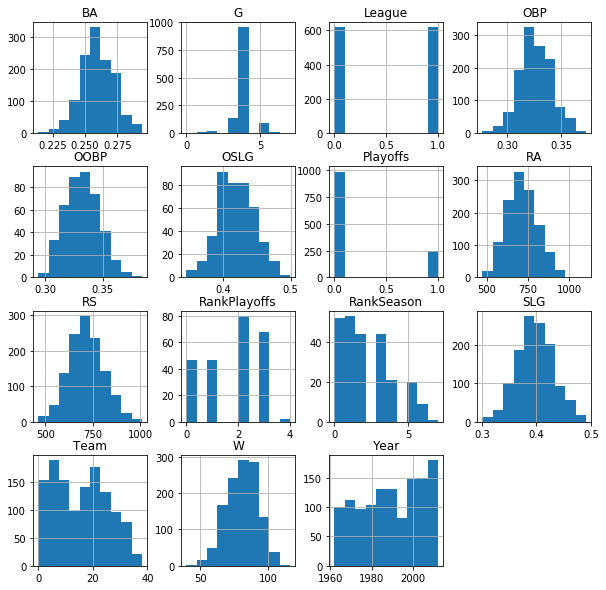

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import openml as oml
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe['RS'] = y
#Plot the distribution of each feature, as well as the target ('RS')
ballframe.hist(figsize=(10,10)) 
plt.show()

,Team,League,Year,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RS
0,0.0,1.0,2012.0,688.0,81.0,0.328,0.418,0.259,0.0,NaN,NaN,4.0,0.317,0.415,734.0
1,1.0,1.0,2012.0,600.0,94.0,0.320,0.389,0.247,1.0,3.0,4.0,4.0,0.306,0.378,700.0
2,2.0,0.0,2012.0,705.0,93.0,0.311,0.417,0.247,1.0,4.0,3.0,4.0,0.315,0.403,712.0
3,3.0,0.0,2012.0,806.0,69.0,0.315,0.415,0.260,0.0,NaN,NaN,4.0,0.331,0.428,734.0
4,4.0,1.0,2012.0,759.0,61.0,0.302,0.378,0.240,0.0,NaN,NaN,4.0,0.335,0.424,613.0


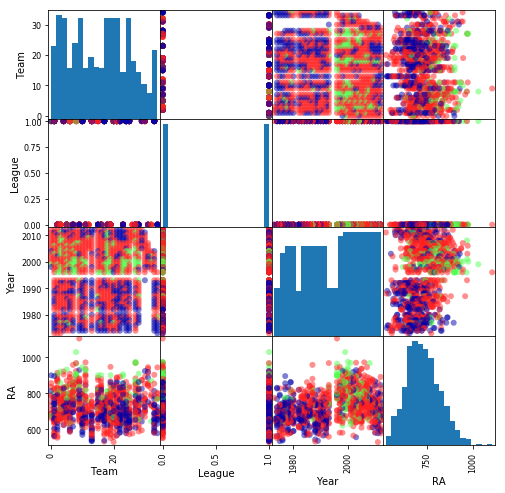

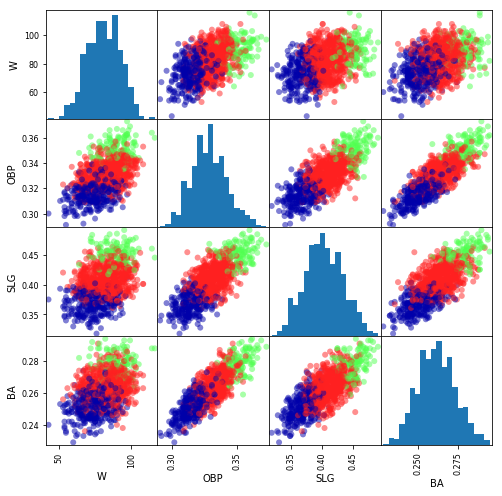

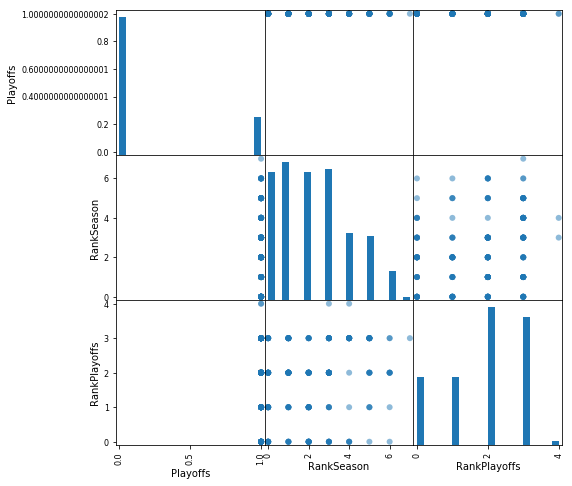

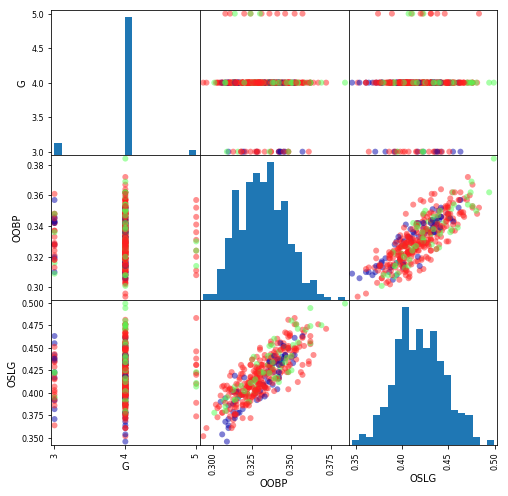

In [3]:
#Visualize the dependency of the target on each feature (use a 2d scatter plot). 
import mglearn 
import numpy as np
# scatter matrix from the dataframe, color by class
display(ballframe.head())
sm = pd.plotting.scatter_matrix(ballframe.iloc[:1000,:4], c=ballframe[:1000]['RS'], figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, cmap=mglearn.cm3)
sm1 = pd.plotting.scatter_matrix(ballframe.iloc[:1000,4:8], c=ballframe[:1000]['RS'], figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, cmap=mglearn.cm3)
sm2 = pd.plotting.scatter_matrix(ballframe.iloc[:1000,8:11],  figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, cmap=mglearn.cm3)
sm3 = pd.plotting.scatter_matrix(ballframe.iloc[:400,11:14], c=ballframe[:400]['RS'], figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, cmap=mglearn.cm3)

Since computer screen only have two dimensions, we cannot plot all features at a time so we have to seperate these feastures. According to above scatter plots, the scatter plot of 'team', 'year', 'league' and 'RA' is so messy that hard to find patterns to predict the target. On the contrary, the scatter plot of 'W', 'OBP', 'SLG' and 'BA' has clear different areas that can be used for regression. As for 'Playoffs', 'RankSeason' and 'RankPlayoffs', they are nominal variables and the scatter plot has few patterns. Considering 'G', 'OOBP' and 'OSLG', points with different colors mix with others so that they might contribute less to the regression. To conclude, 'W', 'OBP','SLG' and 'BA' are more valuable to predict the target. In addition, there are so few points in the third figure so we need to deal with missing values later.

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

In [4]:
#Preprocess;

import sklearn
#display(ballframe.head())
#Team, League, Playoffs,RankSeaso,RankPlayoffs,G are nominal variables
#The get_dummies function automatically transforms all columns that have object type (like strings) or are categorical.
#However, these variables are encoded numeric, so we firstly convert them into string.
ballframe['Team'] = ballframe['Team'].astype(str)
ballframe['League'] = ballframe['League'].astype(str)
ballframe['Playoffs'] = ballframe['Playoffs'].astype(str)
ballframe['RankSeason'] = ballframe['RankSeason'].astype(str)
ballframe['RankPlayoffs'] = ballframe['RankPlayoffs'].astype(str)
ballframe['G'] = ballframe['G'].astype(str)
#Then use get_dummies
ballframe_dummies = pd.get_dummies(ballframe)
print("Features after get_dummies:\n", list(ballframe_dummies.columns))
#move 'RS' to the first column
rs_col = ballframe_dummies['RS']
ballframe_dummies.drop(labels=['RS'], axis=1,inplace = True)
ballframe_dummies.insert(0, 'RS', rs_col)

display(ballframe_dummies.head())
#We can see that get_dummies works below. Then extract arrays.
features = ballframe_dummies.loc[:, 'Year':'G_7.0']
# extract NumPy arrays
X_ori = features.values
y = ballframe_dummies['RS'].values
#OOBP and OSLG contain 'NaN', to deal with it, use Imputer
from sklearn.preprocessing import Imputer
X = Imputer().fit_transform(X_ori)

Features after get_dummies:
 ['Year', 'RA', 'W', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG', 'RS', 'Team_0.0', 'Team_1.0', 'Team_10.0', 'Team_11.0', 'Team_12.0', 'Team_13.0', 'Team_14.0', 'Team_15.0', 'Team_16.0', 'Team_17.0', 'Team_18.0', 'Team_19.0', 'Team_2.0', 'Team_20.0', 'Team_21.0', 'Team_22.0', 'Team_23.0', 'Team_24.0', 'Team_25.0', 'Team_26.0', 'Team_27.0', 'Team_28.0', 'Team_29.0', 'Team_3.0', 'Team_30.0', 'Team_31.0', 'Team_32.0', 'Team_33.0', 'Team_34.0', 'Team_35.0', 'Team_36.0', 'Team_37.0', 'Team_38.0', 'Team_4.0', 'Team_5.0', 'Team_6.0', 'Team_7.0', 'Team_8.0', 'Team_9.0', 'League_0.0', 'League_1.0', 'Playoffs_0.0', 'Playoffs_1.0', 'RankSeason_0.0', 'RankSeason_1.0', 'RankSeason_2.0', 'RankSeason_3.0', 'RankSeason_4.0', 'RankSeason_5.0', 'RankSeason_6.0', 'RankSeason_7.0', 'RankSeason_nan', 'RankPlayoffs_0.0', 'RankPlayoffs_1.0', 'RankPlayoffs_2.0', 'RankPlayoffs_3.0', 'RankPlayoffs_4.0', 'RankPlayoffs_nan', 'G_0.0', 'G_1.0', 'G_2.0', 'G_3.0', 'G_4.0', 'G_5.0', 'G_6.0', 'G_7.0'

,RS,Year,RA,W,OBP,SLG,BA,OOBP,OSLG,Team_0.0,...,RankPlayoffs_4.0,RankPlayoffs_nan,G_0.0,G_1.0,G_2.0,G_3.0,G_4.0,G_5.0,G_6.0,G_7.0
0,734.0,2012.0,688.0,81.0,0.328,0.418,0.259,0.317,0.415,1,...,0,1,0,0,0,0,1,0,0,0
1,700.0,2012.0,600.0,94.0,0.320,0.389,0.247,0.306,0.378,0,...,1,0,0,0,0,0,1,0,0,0
2,712.0,2012.0,705.0,93.0,0.311,0.417,0.247,0.315,0.403,0,...,0,0,0,0,0,0,1,0,0,0
3,734.0,2012.0,806.0,69.0,0.315,0.415,0.260,0.331,0.428,0,...,0,1,0,0,0,0,1,0,0,0
4,613.0,2012.0,759.0,61.0,0.302,0.378,0.240,0.335,0.424,0,...,0,1,0,0,0,0,1,0,0,0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Linear Regression
linreg = LinearRegression().fit(X_train, y_train)
print("Training set score of linear regression: {:.2f}".format(linreg.score(X_train, y_train)))
print("Test score of linear regression: {:.2f}".format(linreg.score(X_test, y_test)))
#Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score of Ridge: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score of Ridge: {:.2f}".format(ridge.score(X_test, y_test)))
#Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score of Lasso: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score of Lasso: {:.2f}".format(lasso.score(X_test, y_test)))
#ElasticNet
elasticnet = ElasticNet().fit(X_train, y_train)
print("Training set score of ElasticNet: {:.2f}".format(elasticnet.score(X_train, y_train)))
print("Test set score of ElasticNet: {:.2f}".format(elasticnet.score(X_test, y_test)))
#kNN
knn = KNeighborsRegressor().fit(X_train, y_train)
print("Training set score of kNN: {:.2f}".format(knn.score(X_train, y_train) ))
print("Test score of kNN: {:.2f}".format(knn.score(X_test, y_test) ))

#Evaluate using cross-validation and the R2 score, with the default parameters. 
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(linreg, X, y)
print("Cross-validation scores for linear regression: {}".format(lr_scores))
ridge_scores = cross_val_score(ridge, X, y)
print("Cross-validation scores for Ridge: {}".format(ridge_scores))
lasso_scores = cross_val_score(lasso, X, y)
print("Cross-validation scores for Lasso: {}".format(lasso_scores))
en_scores = cross_val_score(elasticnet, X, y)
print("Cross-validation scores for ElasticNet: {}".format(en_scores))
knn_scores = cross_val_score(knn, X, y)
print("Cross-validation scores for kNN: {}".format(knn_scores))

Training set score of linear regression: 0.95
Test score of linear regression: 0.95
Training set score of Ridge: 0.89
Test set score of Ridge: 0.90
Training set score of Lasso: 0.85
Test set score of Lasso: 0.87
Training set score of ElasticNet: 0.85
Test set score of ElasticNet: 0.87
Training set score of kNN: 0.84
Test score of kNN: 0.78
Cross-validation scores for linear regression: [0.90855549 0.92320078 0.92727126]
Cross-validation scores for Ridge: [0.80776233 0.86960254 0.84622174]
Cross-validation scores for Lasso: [0.80335658 0.84821867 0.82916537]
Cross-validation scores for ElasticNet: [0.80256733 0.84880087 0.82939704]
Cross-validation scores for kNN: [0.53955081 0.69844995 0.51376991]


Interpretation: According to results of cross validation, linear regression has the highest R^2, compared with Ridge, Lasso and ElasticNet regression. And Ridge, Lasso and Elastic have similar performance with similar R^2. Moreover, R^2 of kNN is much lower than that of other models.
To sum up, considering how much of the data variability is explained, linear regression has the best performance, followed by Ridge, Lasso and Elastic while kNN performs worst.

In [6]:
#Does scaling the data with StandardScaler help?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression
linreg_scaled = LinearRegression().fit(X_train_scaled, y_train)
#Ridge
ridge_scaled = Ridge().fit(X_train_scaled, y_train)
#Lasso
lasso_scaled = Lasso().fit(X_train_scaled, y_train)
#ElasticNet
elasticnet_scaled = ElasticNet().fit(X_train_scaled, y_train)
#kNN
knn_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)

lr_scores_scaled = cross_val_score(linreg_scaled, X, y)
print("Cross-validation scores for linear regression: {}".format(lr_scores_scaled))
ridge_scores_scaled = cross_val_score(ridge_scaled, X, y)
print("Cross-validation scores for Ridge: {}".format(ridge_scores_scaled))
lasso_scores_scaled = cross_val_score(lasso_scaled, X, y)
print("Cross-validation scores for Lasso: {}".format(lasso_scores_scaled))
en_scores_scaled = cross_val_score(elasticnet_scaled, X, y)
print("Cross-validation scores for ElasticNet: {}".format(en_scores_scaled))
knn_scores_scaled = cross_val_score(knn_scaled, X, y)
print("Cross-validation scores for kNN: {}".format(knn_scores_scaled))

Cross-validation scores for linear regression: [0.90855549 0.92320078 0.92727126]
Cross-validation scores for Ridge: [0.80776233 0.86960254 0.84622174]
Cross-validation scores for Lasso: [0.80335658 0.84821867 0.82916537]
Cross-validation scores for ElasticNet: [0.80256733 0.84880087 0.82939704]
Cross-validation scores for kNN: [0.53955081 0.69844995 0.51376991]


After comparing cross validation scores of above results, it's clear that scaling the data with StandardScaler does not help here.

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV 
from sklearn import linear_model
shuffle_split = ShuffleSplit()
#Ridge: The strength of the regularization can be controlled with the alpha parameter. Default is 1.0.
#Ridge regression has L2 regularization
param_grid_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=shuffle_split)
grid_search_ridge.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_ridge.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))
print("Best estimator:\n{}".format(grid_search_ridge.best_estimator_))

Test set score: 0.95
Best parameters: {'alpha': 0.0001}
Best cross-validation score: 0.94
Best estimator:
Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


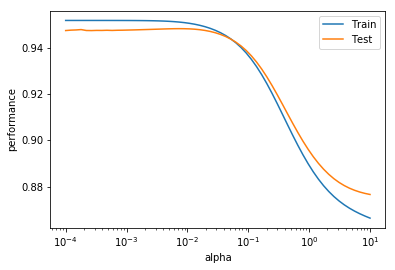

In [35]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py
#http://blog.csdn.net/u014662865/article/details/55251790

alphas = np.logspace(-4, 1, 60)
rdg = Ridge()
train_errors = list()
test_errors = list()
for alpha in alphas:
    rdg.set_params(alpha=alpha)
    rdg.fit(X_train,y_train)
    train_errors.append(rdg.score(X_train,y_train))
    test_errors.append(rdg.score(X_test,y_test))

plt.semilogx(alphas,train_errors,label='Train')
plt.semilogx(alphas,test_errors,label='Test')
plt.legend(loc='upper right')
plt.xlabel('alpha')
plt.ylabel('performance')
plt.show()

As we can see, we get better results of the model after decreasing alpha (less regularization). And the grid search gives the highest test set score (0.95) and cross-validation score (0.94) when alpha=0.001. This also can be observed from the plot. 

In [13]:
#Lasso: Use alpha to control the strength of regularization. 
#Lasso regression has L1 regularization, prefers coefficients to be exactly zero 
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=shuffle_split)
grid_search_lasso.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_lasso.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))
print("Best estimator:\n{}".format(grid_search_lasso.best_estimator_))

Test set score: 0.95
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.94
Best estimator:
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


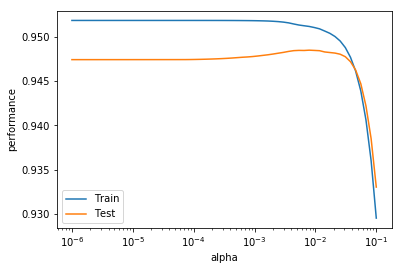

In [15]:
#visulization
lso = Lasso()
train_errors_lasso = list()
test_errors_lasso = list()
alphas = np.logspace(-6, -1, 60)
for alpha in alphas:
    lso.set_params(alpha=alpha)
    lso.fit(X_train,y_train)
    train_errors_lasso.append(lso.score(X_train,y_train))
    test_errors_lasso.append(lso.score(X_test,y_test))

    
plt.semilogx(alphas,train_errors_lasso,label='Train')
plt.semilogx(alphas,test_errors_lasso,label='Test')
plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('performance')
plt.show()

From the result, we get the highest test set score (0.95) and the highest cross_validation score (0.94) when alpha equals 0.001. This finding is consistent with the alpha-performance plot. Too high alpha means more regularization.

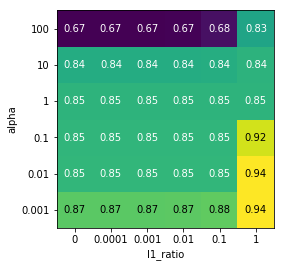

In [11]:
#For ElasticNet, plot a heatmap alpha×l1_ratio→R2 using test set performance.
from sklearn.model_selection import GridSearchCV
param_grid_en = {'alpha': [0.001, 0.01, 0.1, 1, 10,100], 'l1_ratio': [0,0.0001,0.001,0.01, 0.1, 1]}
grid_search_en = GridSearchCV(ElasticNet(), param_grid_en, cv=shuffle_split)
grid_search_en.fit(X_train, y_train)
results = pd.DataFrame(grid_search_en.cv_results_)
scores_en = np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores_en, xlabel='l1_ratio', xticklabels=param_grid_en['l1_ratio'],ylabel='alpha', yticklabels=param_grid_en['alpha'],cmap="viridis");

As we can see from the heatmap, the mean_test_score is higher when l1_ratio equals 1 which means only L1 penalty works. The highest test score is 0.94 when alpha equals 0.01 or 0.001.

Reference: "The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2." Retrieved from http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

W
W
W
[-3.0895782e-01  2.5139701e-01  2.3408475e+00  2.1039465e+03
  1.2968826e+03 -2.4701482e+02 -3.6493305e+01  6.7188347e+01
  6.8629475e+00  1.8317734e+01  2.0107468e+01 -6.1289625e+00
 -1.5370615e+01  1.8079165e+01  0.0000000e+00  1.9727988e+00
 -1.4424645e+01  2.2119034e+01 -1.1308175e+01 -4.6972804e+00
 -2.1866272e+01  1.4343573e+01  1.6499872e+01  1.4232041e+01
 -1.5068232e+01  1.4483050e+01  2.5376987e+01 -5.5443912e+00
 -8.0825310e+00 -1.2743013e+01 -8.9912009e-01 -2.1877859e+01
  1.7515434e+00 -2.0183578e+01 -1.2713453e+01  9.8594608e+00
 -1.0556252e+01 -9.3913822e+00  0.0000000e+00 -1.7322376e+01
  2.0197159e+01  1.7589666e+01 -8.2025833e+00  1.3361005e+01
 -1.1324549e+01  2.0990335e+01 -1.6231548e+01  1.6543587e+01
 -1.5683987e+01 -1.5383360e+00 -4.0457571e-01  2.3708260e+00
  1.0876759e+00  7.1744375e+00  3.0478342e+00 -9.2965298e+00
 -1.4553690e+01 -5.4182520e+00  1.6083714e+01 -1.5353005e+00
  1.7500288e+00 -5.8579702e+00 -4.8967366e+00  5.4306078e+00
  0.0000000e+00 -1

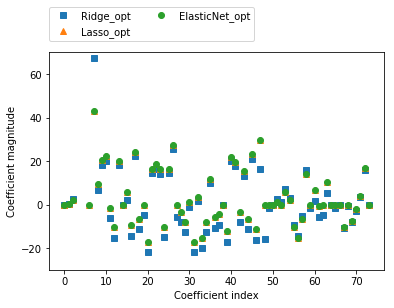

In [19]:
ridge_opt=Ridge(alpha=0.001).fit(X_train,y_train)
lasso_opt=Lasso(alpha=0.001).fit(X_train,y_train)
elastic_opt=ElasticNet(alpha=0.001,l1_ratio=1).fit(X_train,y_train)

plt.plot(ridge_opt.coef_, 's', label="Ridge_opt")
plt.plot(lasso_opt.coef_, '^', label="Lasso_opt")
plt.plot(elastic_opt.coef_,'o',label="ElasticNet_opt")
plt.legend(ncol=2, loc=(0, 1.05))
#plt.xticks(range(X.shape[1]),features, rotation=20)
plt.ylim(-30, 70)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show
#get the most important feature's name
index1 = np.argmax(ridge_opt.coef_)
print(ballframe_dummies.columns[index1])
index2 = np.argmax(lasso_opt.coef_)
print(ballframe_dummies.columns[index2])
index3 = np.argmax(elastic_opt.coef_)
print(ballframe_dummies.columns[index3])
#print their coefficient lists to look for other high coefficients 
print(ridge_opt.coef_)
print(lasso_opt.coef_)
print(elastic_opt.coef_)

Feature importances:
[0.07952594 0.09788766 0.09516826 0.09381297 0.10185802 0.09433791
 0.0474699  0.0414633  0.00310633 0.00827103 0.0062047  0.00600572
 0.0037238  0.0069769  0.         0.0068457  0.00691842 0.00731827
 0.00845204 0.00683048 0.00806135 0.0083192  0.00655552 0.00728436
 0.0062386  0.00662975 0.00711381 0.00173841 0.00708702 0.00572477
 0.00355755 0.00578658 0.00346463 0.0013257  0.00168026 0.00453419
 0.00441586 0.00237602 0.         0.00128043 0.0003257  0.00710026
 0.00739521 0.00654214 0.00748431 0.00201804 0.00532532 0.01133469
 0.01599097 0.00516135 0.00614267 0.00415543 0.00320128 0.00389927
 0.00312827 0.00270781 0.00292254 0.00117577 0.00027317 0.00497755
 0.00424608 0.00467699 0.00389945 0.00405599 0.         0.00689077
 0.         0.00196332 0.00704119 0.01551349 0.01706275 0.01470113
 0.00333572 0.        ]
W
OBP
SLG


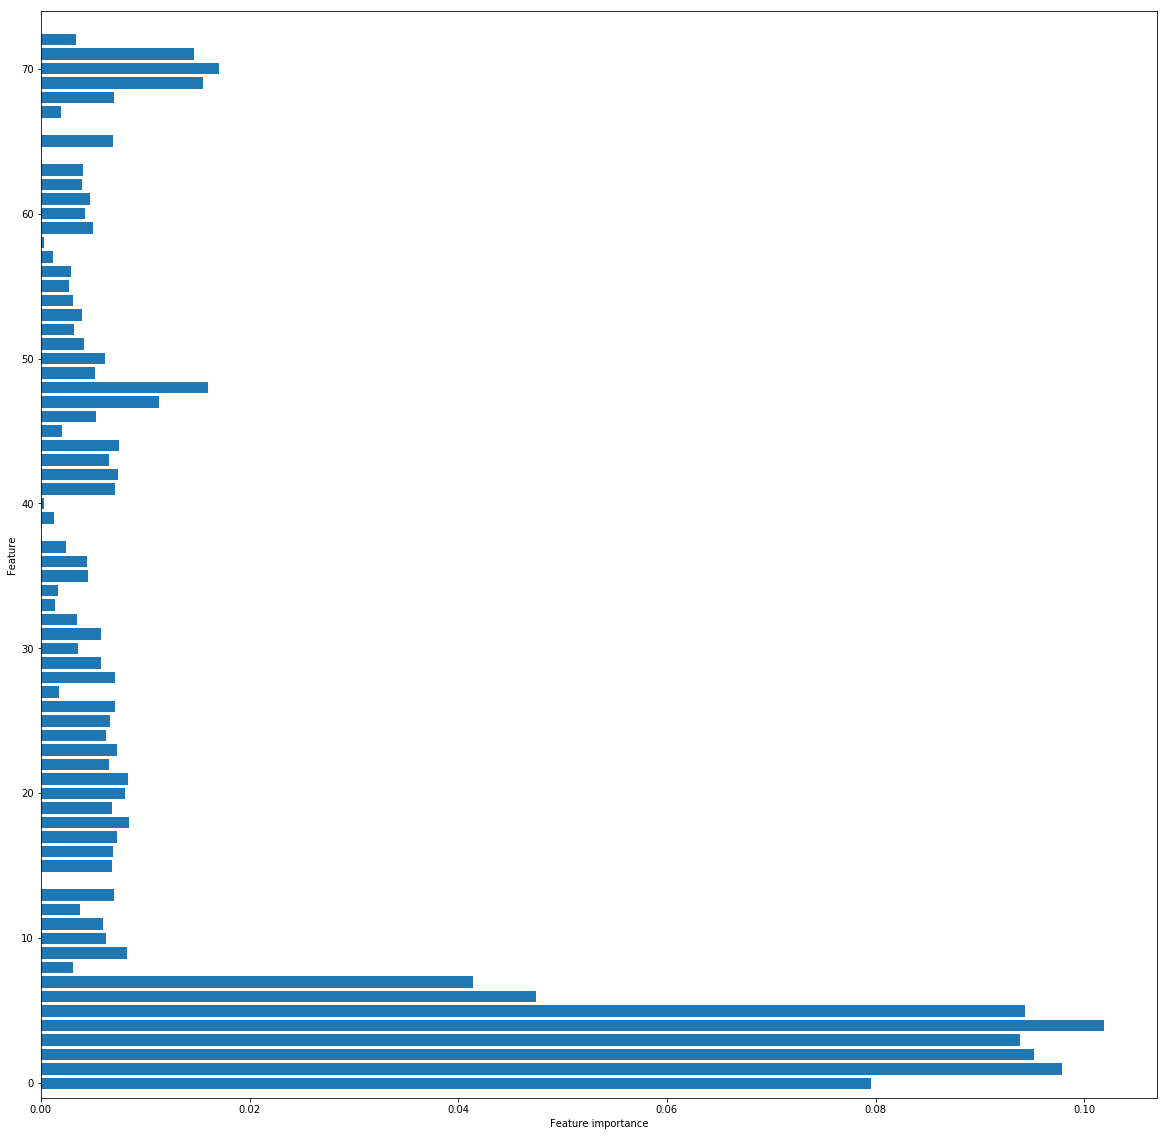

In [36]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train) 
print("Feature importances:\n{}".format(forest.feature_importances_))
def plot_feature_importances_ballframe_dummies(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    #plt.yticks(np.arange(n_features), ballframe_dummies.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,20))

plot_feature_importances_ballframe_dummies(forest)

#get the most important feature's name
print(ballframe_dummies.columns[3])
print(ballframe_dummies.columns[4])
print(ballframe_dummies.columns[5])

For ElasticNet regression, when l1_ratio equals 1, it has L1 penalty which is same as Lasso. This is why optimized Lasso and optimized ElasticNet have same coefficients for all features. 
Ridge, Lasso and ElasticNet agree on the same most important feature that is 'W' which is in the column 3. From coeffient lists, the feature in the column 4 which is 'OBP' have the second highest coeffients, followed the the feature 5 namely 'SLG'.
Onthe other hand, significant features in RandomForest include feature 4 ('OBP') together with feature 5 ('SLG') and the most important one is 'OBP'. In RandomForest, Feature 3 ('W') is not as important as 'OBP' and 'SLG' but still has high importance.
Although linear models disagree with RandomForest on a same most important feature, They agree on two common feature that are 'OBP' and 'SLG'.
Thus, we would suggest people can consider on-base percentage(OBP) and slugging percentage (SLG) when scouting for a baseball player. This conclusion is consistent with what Billy Beane and Paul DePodesta did when they use new strategy to scout.

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [63]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

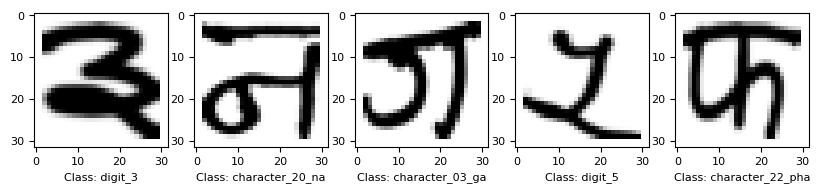

In [68]:
from random import randint
# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [4]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

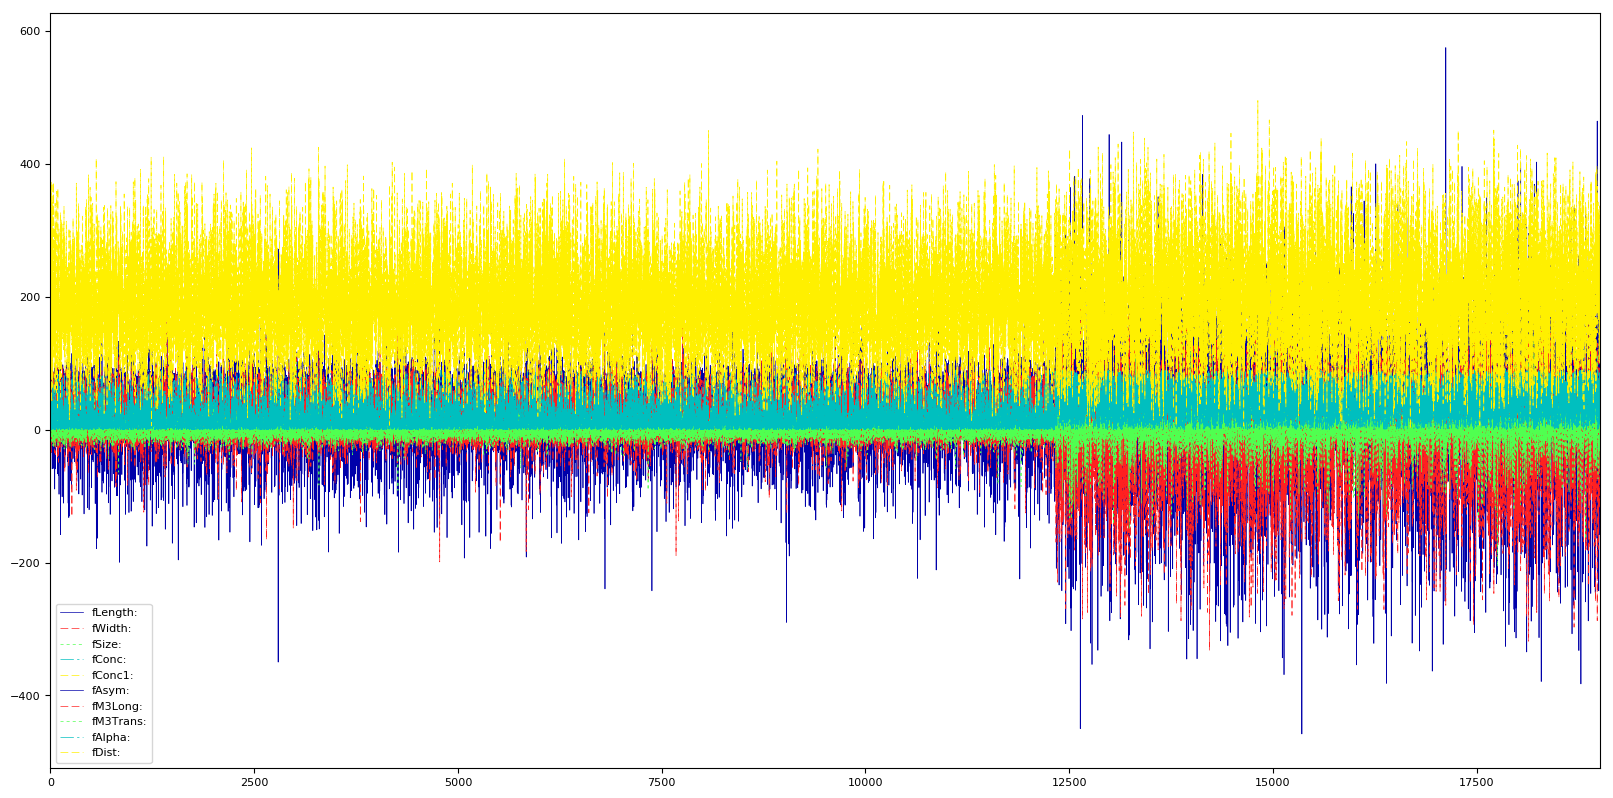

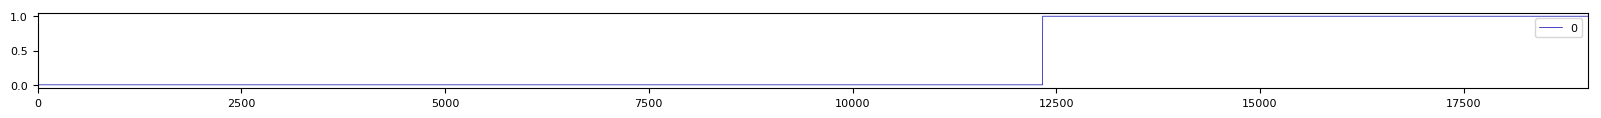

In [6]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

In [4]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')

In [ ]:
import openml as oml
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# Quick visualization
#X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
#magic = pd.DataFrame(X, columns=attribute_names)
#magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
#pd.DataFrame(y).plot(figsize=(20,1));
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data

X, y = magic_data.get_data(target=magic_data.default_target_attribute);
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
gbc1 = GradientBoostingClassifier(learning_rate=1,max_depth=1,random_state=0)
gbc2 = GradientBoostingClassifier(learning_rate=1,max_depth=4,random_state=0)
gbc3 = GradientBoostingClassifier(learning_rate=0.1,max_depth=1,random_state=0)
gbc4 = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,random_state=0)

gbc1_r=gbc1.fit(X_train,y_train)
gbc2_r=gbc2.fit(X_train,y_train)
gbc3_r=gbc3.fit(X_train,y_train)
gbc4_r=gbc4.fit(X_train,y_train)
gbc={gbc1_r,gbc2_r,gbc3_r,gbc4_r}
validation_curve(gbc,X_test,y_test,X_train,y_train)


In the validation_curve figure, dashed curves stand for training data while solid lines stand for testing data. 
As we can see, all models except for the orange one are overfitting because their training set get lower 1-AUROC (i.e. better performance) than their testing set. Among them, the red curves (the model with learn=1.0 and depth=4) starts to be overfitting faster and get much more overfitting than others. The green lines is improved faster than the blue lines because it drops quickly after a few iterations. The orange lines fit both training data and testing data best despite of slight underfitting in the begining. To sum up, in Gradient Boosted Regression Trees, when max_depth is fixed, higher learning rate tend to be overfitting. When the learning rate is fixed, higher max_depth means more overfitting. 